In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.graph_objs as go
%matplotlib inline

# **Data Analysis**

In [2]:
train = pd.read_csv('/kaggle/input/black-friday-sales-prediction/train.csv')

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
# Checking for Null values
round((train.isnull().sum() / train.shape[0]) * 100, 2).astype(str) + ' %'

User_ID                         0.0 %
Product_ID                      0.0 %
Gender                          0.0 %
Age                             0.0 %
Occupation                      0.0 %
City_Category                   0.0 %
Stay_In_Current_City_Years      0.0 %
Marital_Status                  0.0 %
Product_Category_1              0.0 %
Product_Category_2            31.57 %
Product_Category_3            69.67 %
Purchase                        0.0 %
dtype: object

In [7]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


# **Distribution of dataset based on features**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



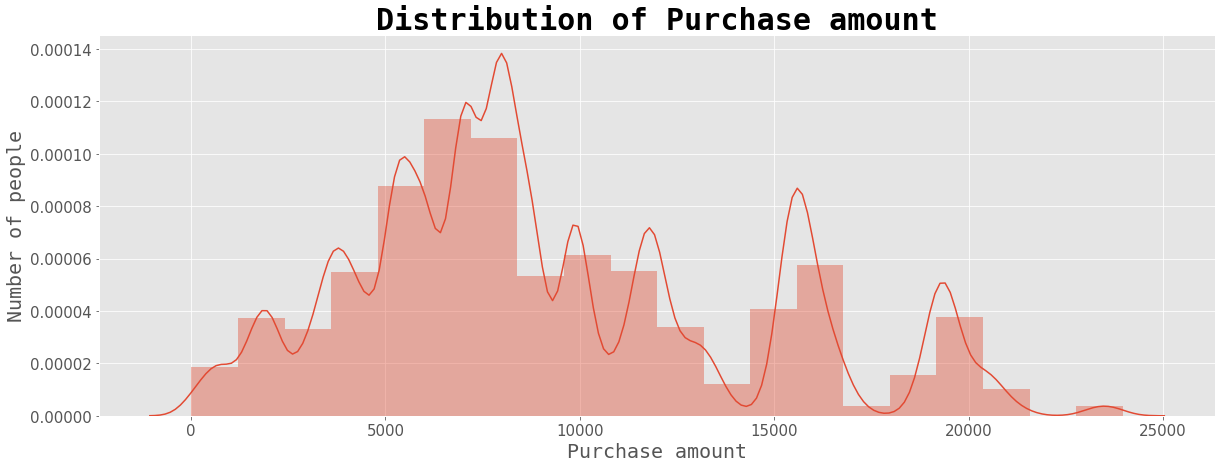

In [8]:
# Creating a distplot for dependent feature 'Purchase'
plt.style.use('ggplot')
plt.figure(figsize = (20, 7))
sns.distplot(train['Purchase'], bins = 20)
plt.title('Distribution of Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.tick_params(labelsize = 15)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



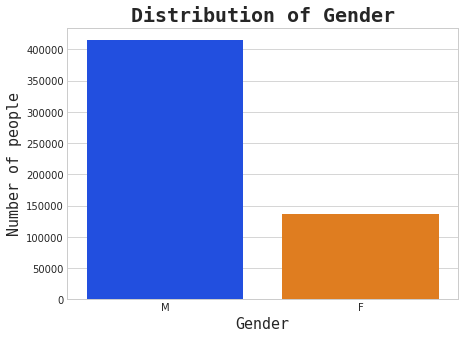

In [9]:
# Creating a barplot for 'Gender'
gen = train['Gender'].value_counts()

plt.figure(figsize = (7, 5))
plt.style.use('seaborn-whitegrid')
sns.barplot(gen.index, gen.values, palette = 'bright')
plt.title('Distribution of Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



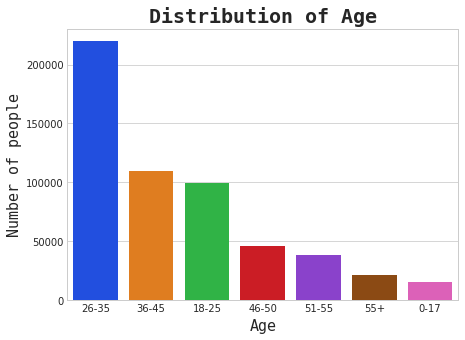

In [10]:
# Creating a barplot for 'Gender'
gen = train['Age'].value_counts()

plt.figure(figsize = (7, 5))
plt.style.use('seaborn-whitegrid')
sns.barplot(gen.index, gen.values, palette = 'bright')
plt.title('Distribution of Age', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Age', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



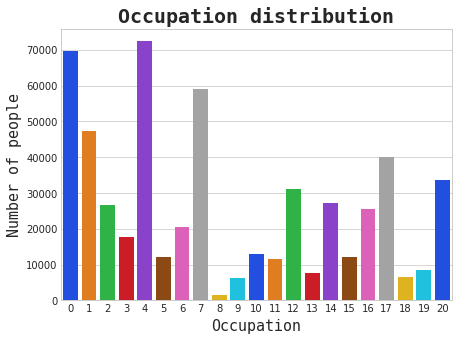

In [11]:
# Creating a barplot for 'Gender'
gen = train['Occupation'].value_counts()

plt.figure(figsize = (7, 5))
plt.style.use('seaborn-whitegrid')
sns.barplot(gen.index, gen.values, palette = 'bright')
plt.title('Occupation distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Occupation', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



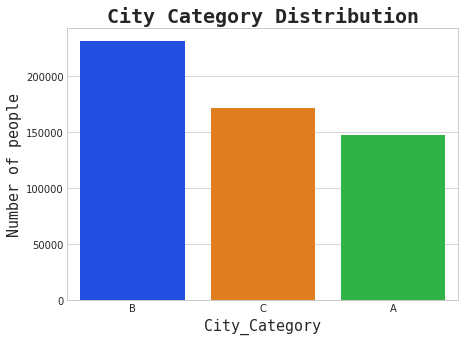

In [12]:
# Creating a barplot for 'Gender'
gen = train['City_Category'].value_counts()

plt.figure(figsize = (7, 5))
plt.style.use('seaborn-whitegrid')
sns.barplot(gen.index, gen.values, palette = 'bright')
plt.title('City Category Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('City_Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



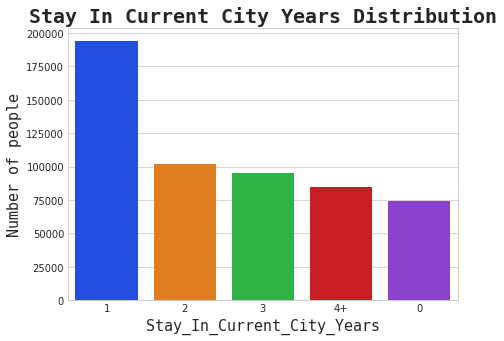

In [13]:
# Creating a barplot for 'Gender'
gen = train['Stay_In_Current_City_Years'].value_counts()

plt.figure(figsize = (7, 5))
plt.style.use('seaborn-whitegrid')
sns.barplot(gen.index, gen.values, palette = 'bright')
plt.title('Stay In Current City Years Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Stay_In_Current_City_Years', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



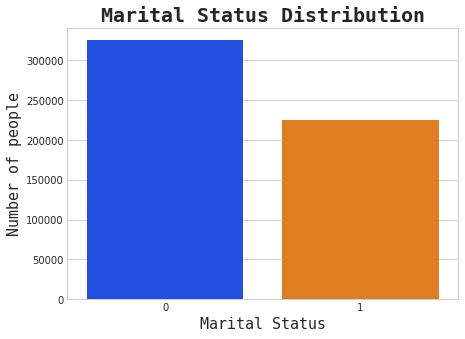

In [14]:
# Creating a barplot for 'Gender'
gen = train['Marital_Status'].value_counts()

plt.figure(figsize = (7, 5))
plt.style.use('seaborn-whitegrid')
sns.barplot(gen.index, gen.values, palette = 'bright')
plt.title('Marital Status Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



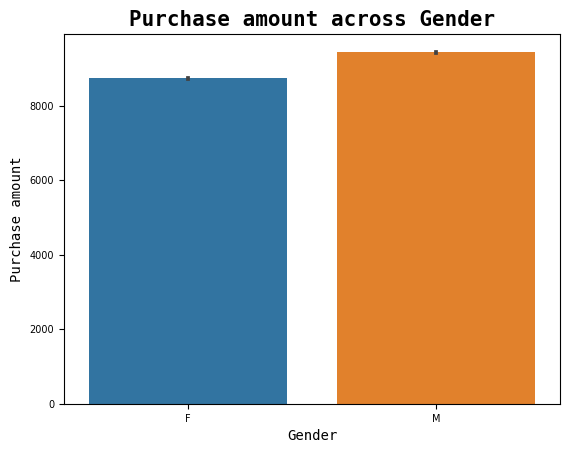

In [15]:
# Creating a barplot of 'Occupation vs Purchase'
plt.style.use('default')
sns.barplot(train['Gender'], train['Purchase'])
plt.title('Purchase amount across Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 7)

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



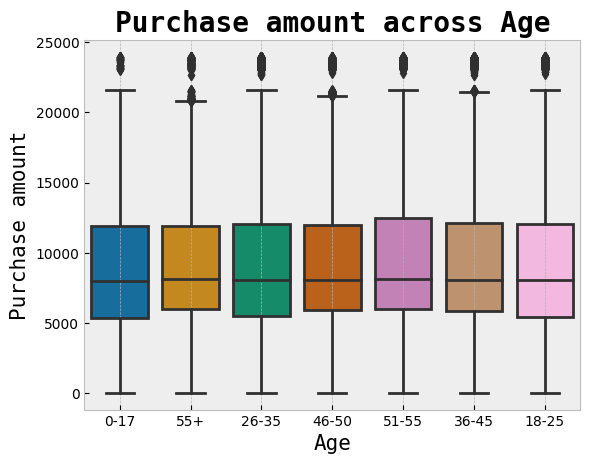

In [16]:
# Creating a boxplot of 'Age vs Purchase'
plt.style.use('bmh')
sns.boxplot(train['Age'], train['Purchase'], palette = 'colorblind')
plt.title('Purchase amount across Age', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Age', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.grid()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



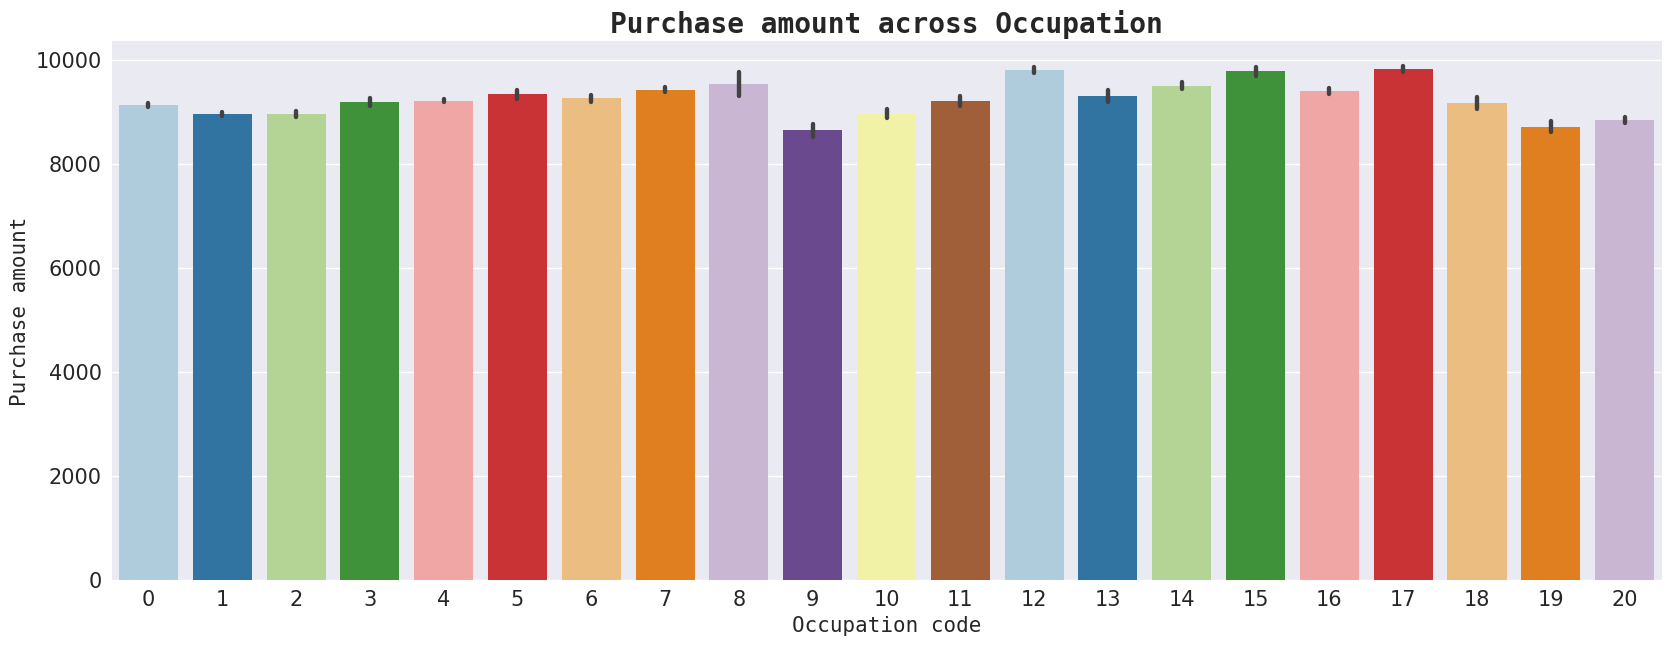

In [17]:
# Creating a barplot of 'Occupation vs Purchase'
plt.figure(figsize = (20, 7))
plt.style.use('seaborn')
sns.barplot(train['Occupation'], train['Purchase'], palette = 'Paired')
plt.title('Purchase amount across Occupation', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Occupation code', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 15)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



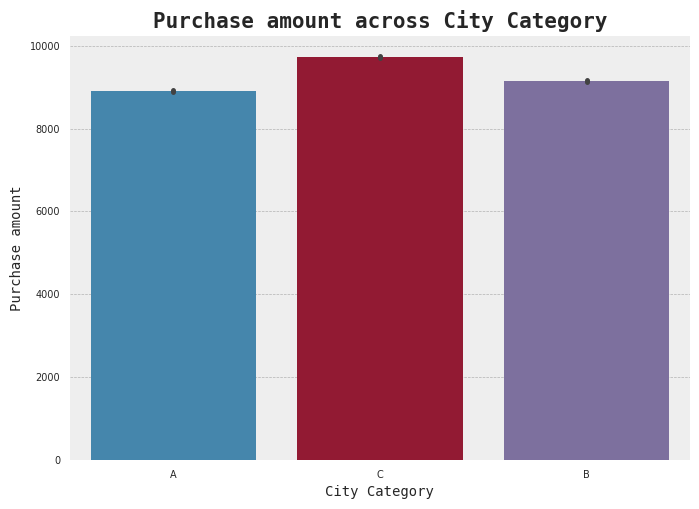

In [18]:
# Creating a barplot of 'City_Category vs Purchase'
plt.style.use('bmh')
sns.barplot(train['City_Category'], train['Purchase'])
plt.title('Purchase amount across City Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.xlabel('City Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 7)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



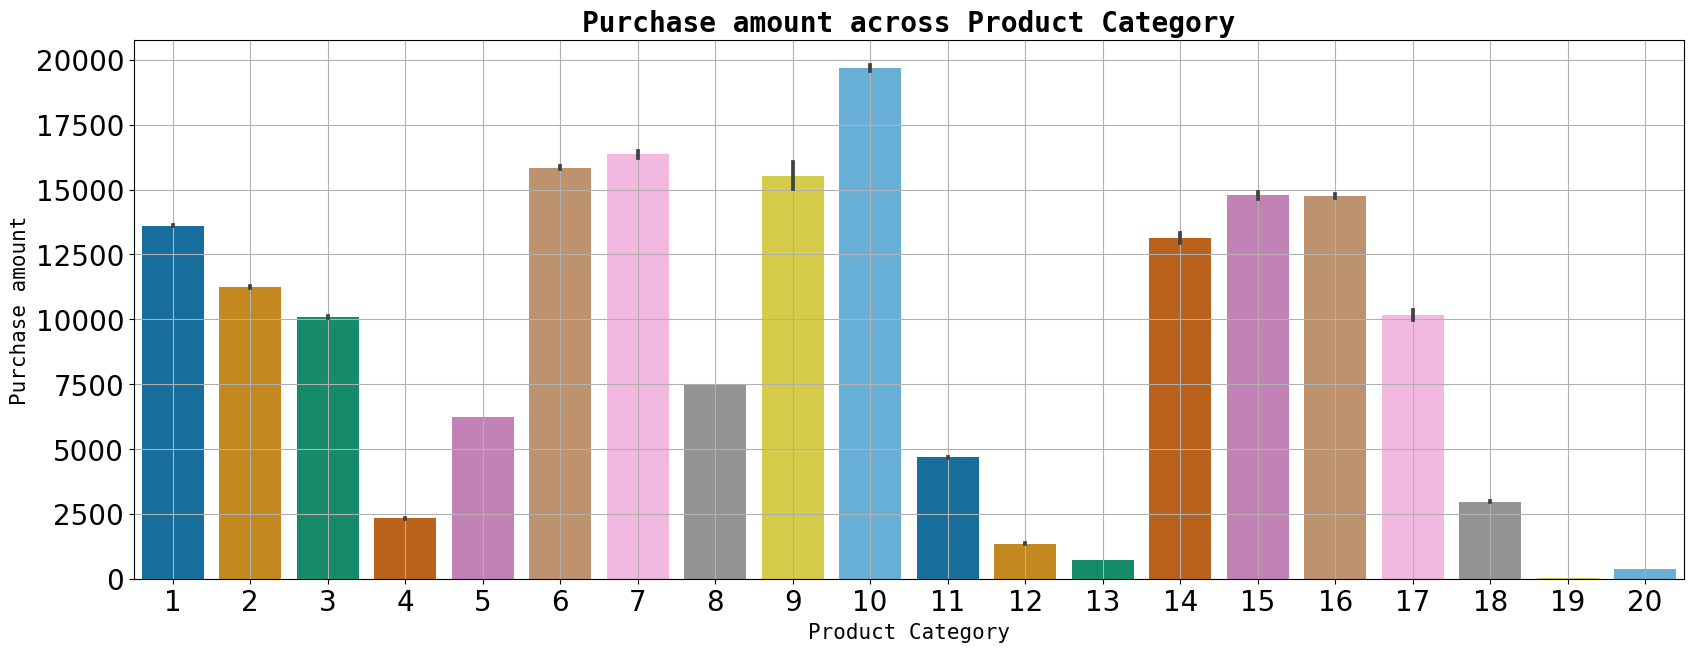

In [19]:
# Creating a barplot of 'Product_Category_1 vs Purchase'
plt.style.use('default')
plt.figure(figsize = (20, 7))
sns.barplot(train['Product_Category_1'], train['Purchase'], palette = 'colorblind')
plt.title('Purchase amount across Product Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Product Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 20)
plt.grid()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



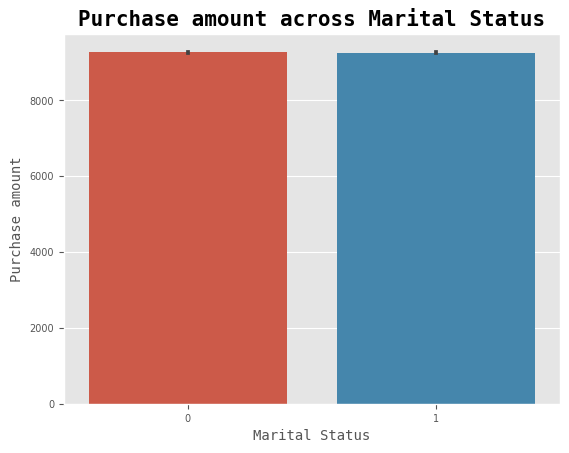

In [20]:
# Creating a barplot of 'Marital Status vs Purchase'
plt.style.use('ggplot')
sns.barplot(train['Marital_Status'], train['Purchase'])
plt.title('Purchase amount across Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.xlabel('Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 7)
plt.show()

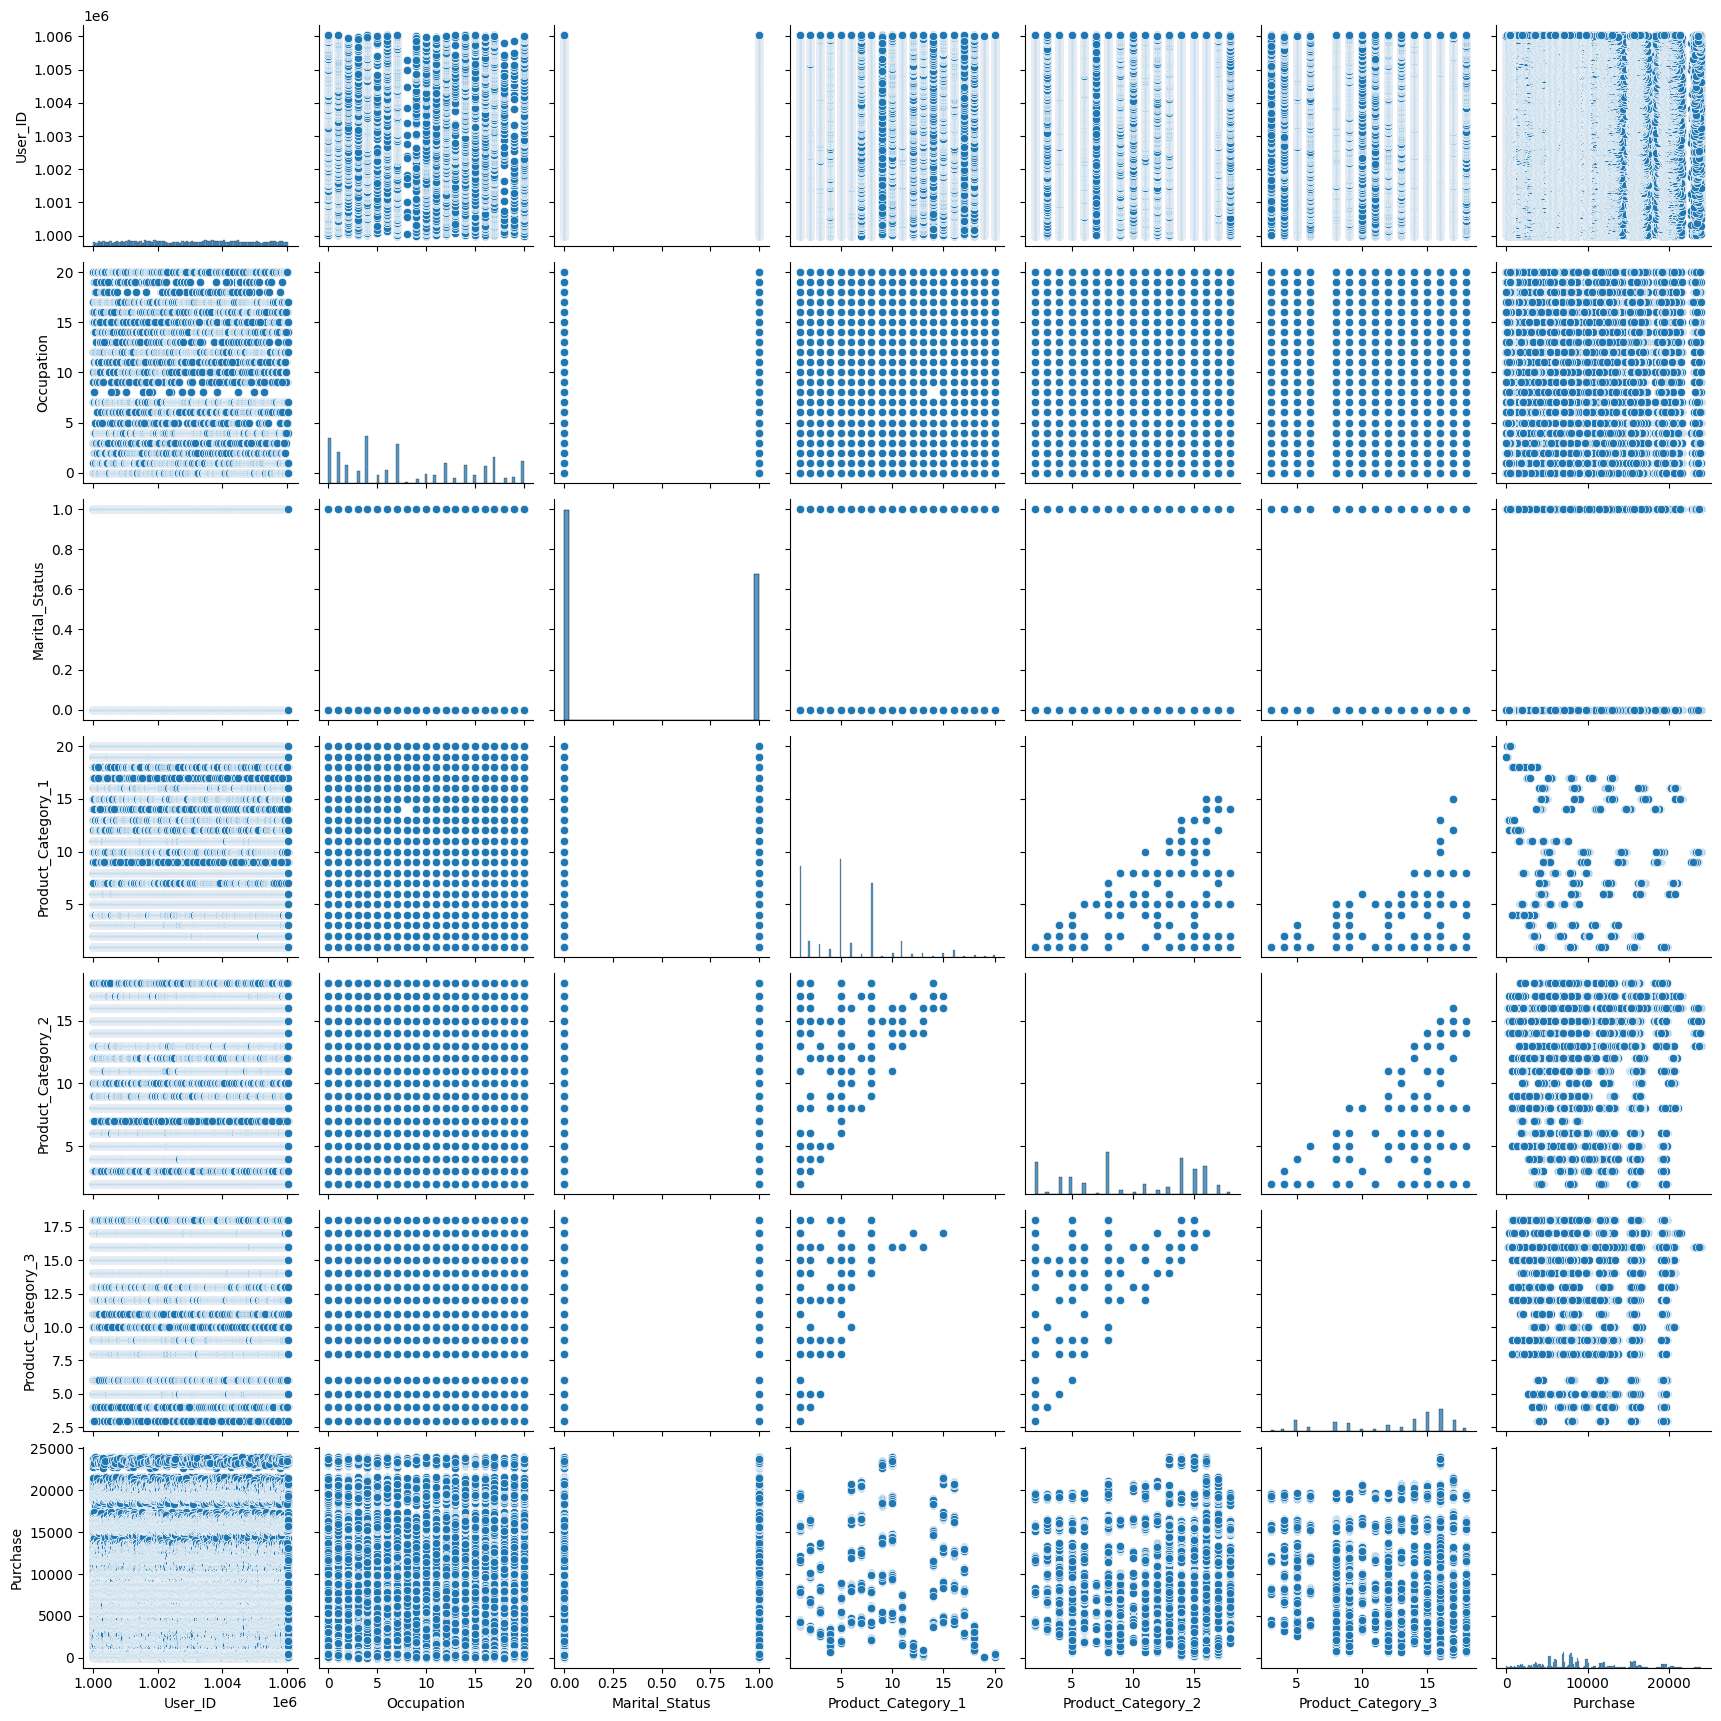

In [21]:
# Creating a Pairplot for all features
plt.style.use('default')
sns.pairplot(train)
plt.show()

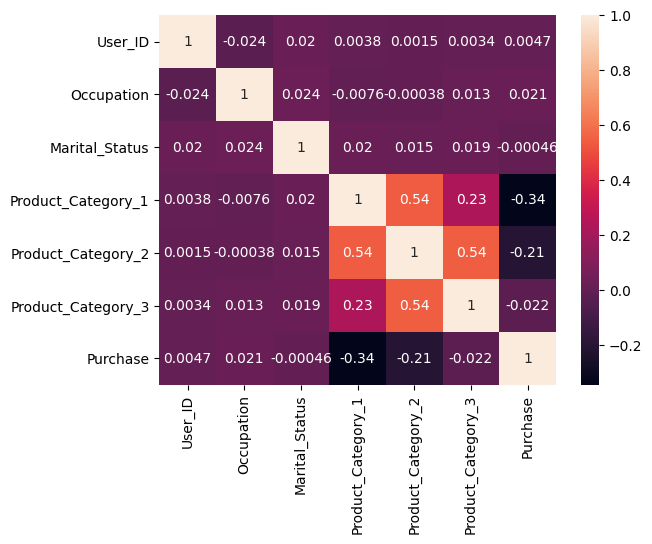

In [22]:
# Creating a heatmap of correlation matrix
sns.heatmap(train.corr(), annot = True)
plt.show()

# **Data Preprocessing**

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [24]:
train['Product_Category_2'].fillna(0, inplace=True)
train['Product_Category_3'].fillna(0, inplace=True)

train['Product_Category_2'] = train['Product_Category_2'].astype(int)
train['Product_Category_3'] = train['Product_Category_3'].astype(int)

In [25]:
# In Gender, replacing 'F' with 0 and 'M' with 1
train.loc[train['Gender'] == 'F', 'Gender'] = 0
train.loc[train['Gender'] == 'M', 'Gender'] = 1

train.loc[train['Age'] == '0-17', 'Age'] = 0
train.loc[train['Age'] == '18-25', 'Age'] = 1
train.loc[train['Age'] == '26-35', 'Age'] = 2
train.loc[train['Age'] == '36-45', 'Age'] = 3
train.loc[train['Age'] == '46-50', 'Age'] = 4
train.loc[train['Age'] == '51-55', 'Age'] = 5
train.loc[train['Age'] == '55+', 'Age'] = 6

# In 'Stay_In_Current_City_Years', replacing '4+' with 4
train.loc[train['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = 4

train.loc[train['City_Category'] == 'A', 'City_Category'] = 0
train.loc[train['City_Category'] == 'B', 'City_Category'] = 1
train.loc[train['City_Category'] == 'C', 'City_Category'] = 2

# Converting all object type columns to integer to maintain consistency across the dataframe
train['Gender'] = train['Gender'].astype(int)
train['Age'] = train['Age'].astype(int)
train['City_Category'] = train['City_Category'].astype(int)
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].astype(int)

In [26]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969


In [27]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [28]:
# Introducing a new feature 'Category_Count', which identifies the number of unique categories from each row in the dataframe,
# which indicates the number of unique categories a customer has shopped from
conditions = [
    (train['Product_Category_1'] != 0) & (train['Product_Category_2'] == 0) & (train['Product_Category_3'] == 0),
    (train['Product_Category_1'] != 0) & (train['Product_Category_2'] != 0) & (train['Product_Category_3'] == 0),
    (train['Product_Category_1'] != 0) & (train['Product_Category_2'] != 0) & (train['Product_Category_3'] != 0)]
choices = [1, 2, 3]
train['Category_Count'] = np.select(conditions, choices, default=0)    

In [29]:
# Introducing a new feature 'Product_Score',
# which indicates the frequency of a product relative to the maximum frequency of a product in the entire dataset
# frequency means the number of times a product appears in the dataset
train['Product_Score'] = 0.0
required_product_data = train[['Product_ID', 'Product_Score']]

# marking the default frequency as 1 so that increments at each iteration
required_product_data['Frequency'] = 1

# group the data using Product_ID, which returns sum of frequencies (total) for each Product_ID
grouped_product_data = required_product_data.groupby(['Product_ID']).sum()
grouped_product_data = grouped_product_data.reset_index()

grouped_product_data.head()

,Product_ID,Product_Score,Frequency
0,P00000142,0.0,1152
1,P00000242,0.0,376
2,P00000342,0.0,244
3,P00000442,0.0,92
4,P00000542,0.0,149


In [30]:
# maximum frequency of a product in the dataframe
max_frequency = grouped_product_data['Frequency'].max()

final_product_data = grouped_product_data[['Product_ID', 'Product_Score', 'Frequency']]

# divide each product's frequency with maximum frequency
# apply to each row in the dataframe
for index, row in final_product_data.iterrows():
    product_score = (float(row['Frequency']) / float(max_frequency))
    final_product_data.at[index, 'Product_Score'] = product_score

In [31]:
final_product_data.head()

,Product_ID,Product_Score,Frequency
0,P00000142,0.612766,1152
1,P00000242,0.200000,376
2,P00000342,0.129787,244
3,P00000442,0.048936,92
4,P00000542,0.079255,149


In [32]:
for index, row in train.iterrows():
    p_score = final_product_data.loc[final_product_data.Product_ID == row['Product_ID'], 'Product_Score'].values[0]
    train.at[index, 'Product_Score'] = p_score

In [33]:
for index, row in train.iterrows():
    p_score = final_product_data.loc[final_product_data.Product_ID == row['Product_ID'], 'Product_Score'].values[0]
    train.at[index, 'Product_Score'] = p_score
    
train['User_Score'] = 0.0
required_user_data = train[['User_ID', 'User_Score']]

# default frequency of users is set to 1, which increments at each iteration
required_user_data['Frequency'] = 1

# group user data by User_ID
grouped_user_data = required_user_data.groupby(['User_ID']).sum()
grouped_user_data = grouped_user_data.reset_index()

grouped_user_data.head()

,User_ID,User_Score,Frequency
0,1000001,0.0,35
1,1000002,0.0,77
2,1000003,0.0,29
3,1000004,0.0,14
4,1000005,0.0,106


In [34]:
# Introducing a new feature 'User_Score',
# which indicates the frequency of a User_ID relative to the maximum frequency of a User_ID in the entire dataset
# frequency means the number of times a USer_ID appears in the dataset
train['User_Score'] = 0.0
required_user_data = train[['User_ID', 'User_Score']]

# default frequency of users is set to 1, which increments at each iteration
required_user_data['Frequency'] = 1

# group user data by User_ID
grouped_user_data = required_user_data.groupby(['User_ID']).sum()
grouped_user_data = grouped_user_data.reset_index()

grouped_user_data.head()

,User_ID,User_Score,Frequency
0,1000001,0.0,35
1,1000002,0.0,77
2,1000003,0.0,29
3,1000004,0.0,14
4,1000005,0.0,106


In [35]:
# maximum frequency of User_ID
max_frequency = grouped_user_data['Frequency'].max()

final_user_data = grouped_user_data[['User_ID', 'User_Score', 'Frequency']]

# divide each user's frequency with maximum frequency
# apply to each row in the dataframe
for index, row in final_user_data.iterrows():
    product_score = (float(row['Frequency']) / float(max_frequency))
    final_user_data.at[index, 'User_Score'] = product_score
    
for index, row in train.iterrows():
    p_score = final_user_data.loc[final_user_data.User_ID == row['User_ID'], 'User_Score'].values[0]
    train.at[index, 'User_Score'] = p_score
    
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Category_Count,Product_Score,User_Score
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370,1,0.120745,0.034113
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200,3,0.309043,0.034113
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422,1,0.054255,0.034113
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057,2,0.181383,0.034113
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969,1,0.107979,0.075049


In [36]:
test = pd.read_csv('/kaggle/input/black-friday-sales-prediction/test.csv')

In [37]:
test['Product_Category_2'].fillna(0, inplace=True)
test['Product_Category_3'].fillna(0, inplace=True)

test['Product_Category_2'] = test['Product_Category_2'].astype(int)
test['Product_Category_3'] = test['Product_Category_3'].astype(int)

# In Gender, replacing 'F' with 0 and 'M' with 1
test.loc[test['Gender'] == 'F', 'Gender'] = 0
test.loc[test['Gender'] == 'M', 'Gender'] = 1

test.loc[test['Age'] == '0-17', 'Age'] = 0
test.loc[test['Age'] == '18-25', 'Age'] = 1
test.loc[test['Age'] == '26-35', 'Age'] = 2
test.loc[test['Age'] == '36-45', 'Age'] = 3
test.loc[test['Age'] == '46-50', 'Age'] = 4
test.loc[test['Age'] == '51-55', 'Age'] = 5
test.loc[test['Age'] == '55+', 'Age'] = 6

# In 'Stay_In_Current_City_Years', replacing '4+' with 4
test.loc[test['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = 4

test.loc[test['City_Category'] == 'A', 'City_Category'] = 0
test.loc[test['City_Category'] == 'B', 'City_Category'] = 1
test.loc[test['City_Category'] == 'C', 'City_Category'] = 2

# Converting all object type columns to integer to maintain consistency across the dataframe
test['Gender'] = test['Gender'].astype(int)
test['Age'] = test['Age'].astype(int)
test['City_Category'] = test['City_Category'].astype(int)
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].astype(int)

# Introducing a new feature 'Category_Count', which identifies the number of unique categories from each row in the dataframe,
# which indicates the number of unique categories a customer has shopped from
conditions = [
    (test['Product_Category_1'] != 0) & (test['Product_Category_2'] == 0) & (test['Product_Category_3'] == 0),
    (test['Product_Category_1'] != 0) & (test['Product_Category_2'] != 0) & (test['Product_Category_3'] == 0),
    (test['Product_Category_1'] != 0) & (test['Product_Category_2'] != 0) & (test['Product_Category_3'] != 0)]
choices = [1, 2, 3]
test['Category_Count'] = np.select(conditions, choices, default=0)    

test['Product_Score'] = 0.0
required_product_data = test[['Product_ID', 'Product_Score']]

# marking the default frequency as 1 so that increments at each iteration
required_product_data['Frequency'] = 1

# group the data using Product_ID, which returns sum of frequencies (total) for each Product_ID
grouped_product_data = required_product_data.groupby(['Product_ID']).sum()
grouped_product_data = grouped_product_data.reset_index()

# maximum frequency of a product in the dataframe
max_frequency = grouped_product_data['Frequency'].max()

final_product_data = grouped_product_data[['Product_ID', 'Product_Score', 'Frequency']]

# divide each product's frequency with maximum frequency
# apply to each row in the dataframe
for index, row in final_product_data.iterrows():
    product_score = (float(row['Frequency']) / float(max_frequency))
    final_product_data.at[index, 'Product_Score'] = product_score
    
for index, row in test.iterrows():
    p_score = final_product_data.loc[final_product_data.Product_ID == row['Product_ID'], 'Product_Score'].values[0]
    test.at[index, 'Product_Score'] = p_score
    
test['User_Score'] = 0.0
required_user_data = test[['User_ID', 'User_Score']]

# default frequency of users is set to 1, which increments at each iteration
required_user_data['Frequency'] = 1

# group user data by User_ID
grouped_user_data = required_user_data.groupby(['User_ID']).sum()
grouped_user_data = grouped_user_data.reset_index()

grouped_user_data.head()

    
# maximum frequency of User_ID
max_frequency = grouped_user_data['Frequency'].max()

final_user_data = grouped_user_data[['User_ID', 'User_Score', 'Frequency']]

# divide each user's frequency with maximum frequency
# apply to each row in the dataframe
for index, row in final_user_data.iterrows():
    product_score = (float(row['Frequency']) / float(max_frequency))
    final_user_data.at[index, 'User_Score'] = product_score
    
for index, row in test.iterrows():
    p_score = final_user_data.loc[final_user_data.User_ID == row['User_ID'], 'User_Score'].values[0]
    test.at[index, 'User_Score'] = p_score

In [39]:
cols = list(train)
cols.insert(14, cols.pop(cols.index('Purchase')))

train = train.loc[:, cols]
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Category_Count,Product_Score,User_Score,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,1,0.120745,0.034113,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,3,0.309043,0.034113,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1,0.054255,0.034113,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,2,0.181383,0.034113,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,1,0.107979,0.075049,7969


In [40]:
train.corr()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Category_Count,Product_Score,User_Score,Purchase
User_ID,1.000000,-0.033474,0.032698,-0.023971,0.022859,-0.030737,0.020443,0.003825,0.003896,0.003605,0.004270,0.003688,-0.032458,0.004716
Gender,-0.033474,1.000000,-0.004262,0.117291,-0.004515,0.014660,-0.011603,-0.045594,-0.000954,0.036146,0.026808,0.020456,0.073517,0.060346
Age,0.032698,-0.004262,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.018770,-0.007422,-0.021246,-0.020741,-0.060446,0.015839
Occupation,-0.023971,0.117291,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,0.006712,0.012269,0.011600,0.011679,-0.002929,0.020833
City_Category,0.022859,-0.004515,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,0.016003,0.035525,0.040739,0.109546,-0.522198,0.061914
Stay_In_Current_City_Years,-0.030737,0.014660,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,0.001262,0.001977,0.002735,0.001470,-0.000280,0.005422
Marital_Status,0.020443,-0.011603,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,0.001099,-0.004629,-0.011257,-0.010415,0.000678,-0.000463
Product_Category_1,0.003825,-0.045594,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,-0.067877,-0.385534,-0.518270,-0.205178,0.017748,-0.343703
Product_Category_2,0.003896,-0.000954,0.018770,0.006712,0.016003,0.001262,0.001099,-0.067877,1.000000,0.094750,0.444873,0.098062,-0.027482,0.052288
Product_Category_3,0.003605,0.036146,-0.007422,0.012269,0.035525,0.001977,-0.004629,-0.385534,0.094750,1.000000,0.791044,0.262332,-0.050203,0.288501


<AxesSubplot:>

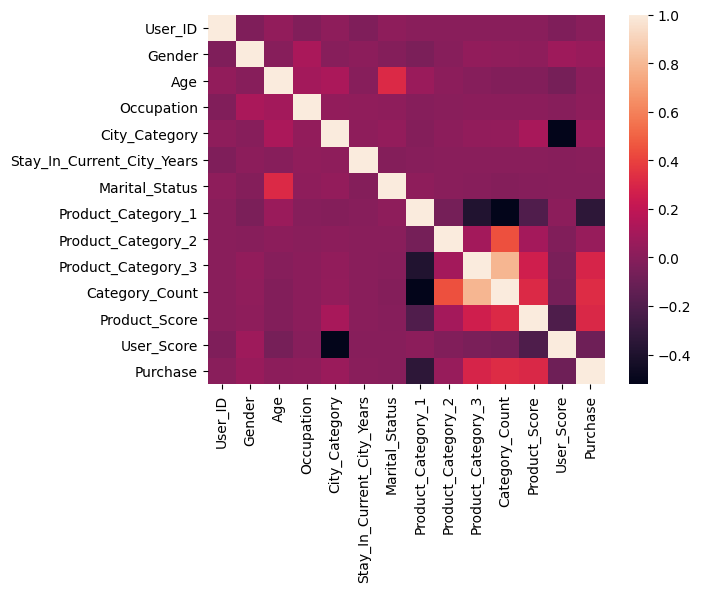

In [41]:
sns.heatmap(data=train.corr())

In [42]:
x_test = test.drop(['Product_ID'], axis = 1)
X = train.drop(['Purchase', 'Product_ID'], axis = 1)
Y = train['Purchase']

In [43]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  int64  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  int64  
 9   Product_Category_3          550068 non-null  int64  
 10  Category_Count              550068 non-null  int64  
 11  Product_Score               550068 non-null  float64
 12  User_Score                  550068 non-null  float64
dtypes: float64(2),

In [45]:
xgb.fit(X, Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Gender                      233599 non-null  int64  
 2   Age                         233599 non-null  int64  
 3   Occupation                  233599 non-null  int64  
 4   City_Category               233599 non-null  int64  
 5   Stay_In_Current_City_Years  233599 non-null  int64  
 6   Marital_Status              233599 non-null  int64  
 7   Product_Category_1          233599 non-null  int64  
 8   Product_Category_2          233599 non-null  int64  
 9   Product_Category_3          233599 non-null  int64  
 10  Category_Count              233599 non-null  int64  
 11  Product_Score               233599 non-null  float64
 12  User_Score                  233599 non-null  float64
dtypes: float64(2),

In [48]:
predictions = test[['User_ID', 'Product_ID']]
predictions['Purchase'] = xgb.predict(x_test)

In [49]:
predictions.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,16086.380859
1,1000009,P00113442,9768.596680
2,1000010,P00288442,6548.830566
3,1000010,P00145342,2988.229980
4,1000011,P00053842,3144.736328


In [57]:
predictions.to_csv('pred.csv')